In [1]:
import numpy as np
import pandas as pd
import random as rnd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
train_df = pd.read_csv('Titanic/train.csv')
test_df = pd.read_csv('Titanic/test.csv')
combine = [train_df, test_df]

In [3]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_df.info()
print('-'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [7]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Toufik, Mr. Nakli",male,347082,B96 B98,S
freq,1,577,7,4,644


In [8]:
train_df[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [9]:
train_df[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [10]:
train_df[['SibSp','Survived']].groupby(['SibSp']).mean().sort_values(by='Survived',ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [11]:
train_df[['Parch','Survived']].groupby(['Parch'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


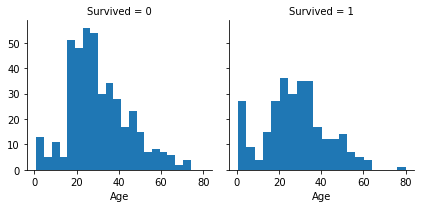

In [12]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

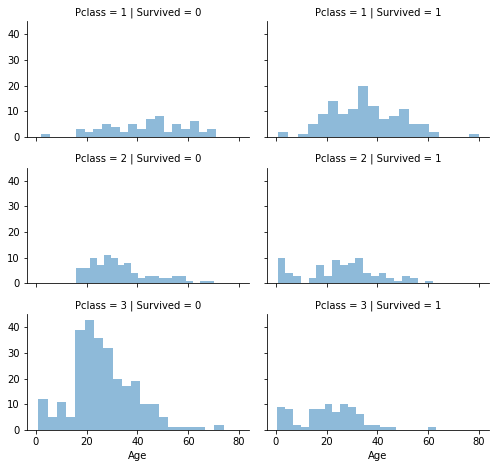

In [13]:
g = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
g.map(plt.hist, 'Age', alpha=0.5, bins=20)

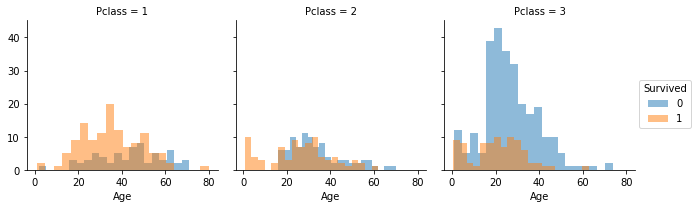

In [14]:
g = sns.FacetGrid(train_df, hue='Survived', col='Pclass')
g.map(plt.hist, 'Age', alpha=0.5, bins=20)
g.add_legend()

C:\Users\sunqu\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\sunqu\Anaconda3\lib\site-packages\seaborn\axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


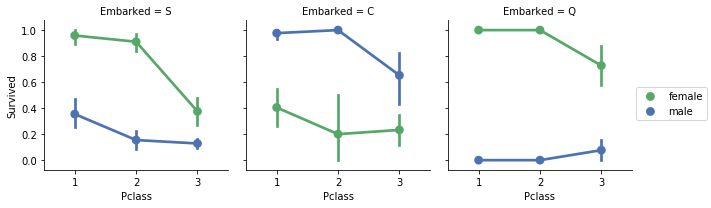

In [15]:
g = sns.FacetGrid(train_df, col='Embarked')
g.map(sns.pointplot, 'Pclass', 'Survived','Sex',palette='deep')
g.add_legend()

C:\Users\sunqu\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


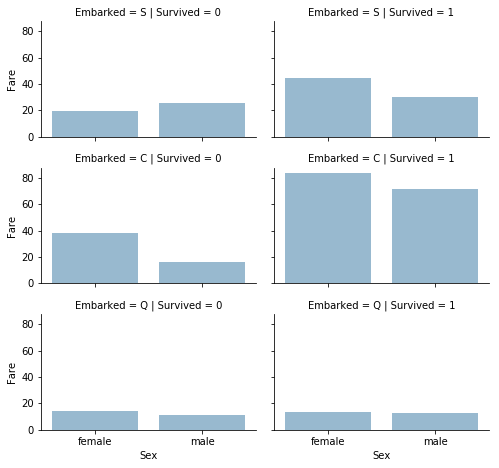

In [16]:
g = sns.FacetGrid(train_df,row='Embarked',col='Survived',size=2.2, aspect=1.6)
g.map(sns.barplot, 'Sex', 'Fare', alpha=0.5, ci=None)

C:\Users\sunqu\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


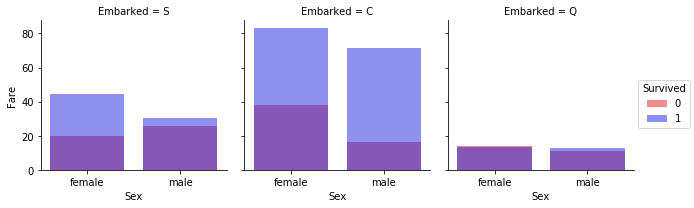

In [17]:
g = sns.FacetGrid(train_df, col='Embarked', hue='Survived',palette={0:'r',1:'b'})
g.map(sns.barplot,'Sex','Fare',alpha=0.5,ci=None)
g.add_legend()

In [18]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket','Cabin'], axis=1)
test_df = test_df.drop(['Ticket','Cabin'], axis=1)
combine = [train_df, test_df]

print("After", train_df.shape, test_df.shape,combine[0].shape, combine[1].shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)
After (891, 10) (418, 9) (891, 10) (418, 9)


In [19]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand= False)
    
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [20]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady','Countess','Capt','Col',\
                                                'Don','Dr','Major','Rev','Sir','Johnkheer',\
                                                'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle','Miss')
    dataset['Title'] = dataset['Title'].replace('Ms','Miss')
    dataset['Title'] = dataset['Title'].replace('Mme','Miss')

print
train_df[['Title','Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,Title,Survived
4,Mrs,0.792000
2,Miss,0.704301
1,Master,0.575000
5,Rare,0.363636
3,Mr,0.156673
0,Jonkheer,0.000000


In [21]:
title_mapping = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Rare':5}

for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1.0


In [22]:
train_df = train_df.drop(['Name','PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df,test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

In [23]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female':1, 'male':0}).astype(int)
    
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1.0
1,1,1,1,38.0,1,0,71.2833,C,3.0
2,1,3,1,26.0,0,0,7.9250,S,2.0
3,1,1,1,35.0,1,0,53.1000,S,3.0
4,0,3,0,35.0,0,0,8.0500,S,1.0


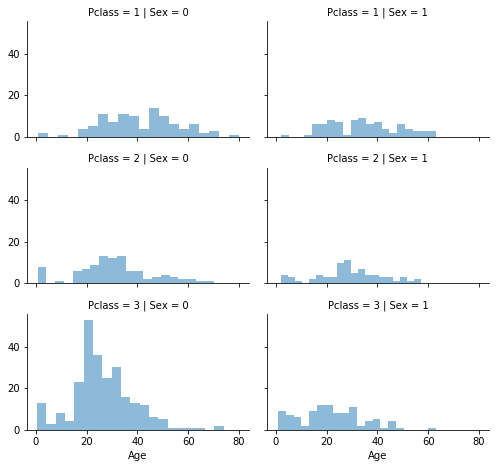

In [24]:
g = sns.FacetGrid(train_df,row='Pclass',col='Sex',size=2.2,aspect=1.6)
g.map(plt.hist, 'Age', alpha=0.5, bins=20)

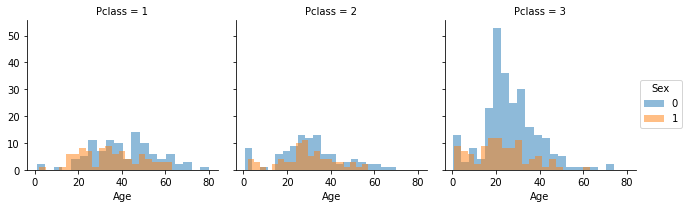

In [25]:
g = sns.FacetGrid(train_df, hue='Sex', col='Pclass')
g.map(plt.hist, 'Age', alpha=0.5, bins=20)
g.add_legend()

In [26]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [27]:
for dataset in combine:
    for i in range(0,2):
        for j in range(0,3):
            guess_df = dataset[(dataset['Sex'] ==i) & (dataset['Pclass'] == j+1)]['Age'].dropna()
            
#             age_mean = guess_df.mean()
#             age_std = guess_df.std()
#             age_guess = rnd.uniform(age_mean-age_std, age_mean+age_std)
            
            age_guess = guess_df.median()
            
            guess_ages[i,j] = int(age_guess/0.5 + 0.5) * 0.5
    for i in range(0,2):
        for j in range(0,3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex==i) & (dataset.Pclass==j+1),\
                       'Age'] = guess_ages[i,j]
            
    dataset['Age'] = dataset['Age'].astype(int)
    
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1.0
1,1,1,1,38,1,0,71.2833,C,3.0
2,1,3,1,26,0,0,7.9250,S,2.0
3,1,1,1,35,1,0,53.1000,S,3.0
4,0,3,0,35,0,0,8.0500,S,1.0


In [28]:
train_df['AgeBand'] = pd.cut(train_df['Age'],5)
train_df[['AgeBand','Survived']].groupby(['AgeBand'],as_index=False).mean().sort_values(by='AgeBand',ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [29]:
for dataset in combine:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] >16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 64), 'Age'] = 2
    dataset.loc[dataset['Age'] > 64, 'Age'] = 3
    
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1.0,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3.0,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2.0,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3.0,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1.0,"(32.0, 48.0]"


In [30]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1.0
1,1,1,1,2,1,0,71.2833,C,3.0
2,1,3,1,1,0,0,7.9250,S,2.0
3,1,1,1,2,1,0,53.1000,S,3.0
4,0,3,0,2,0,0,8.0500,S,1.0


In [31]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    
train_df[['FamilySize','Survived']].groupby(['FamilySize'],as_index=False).mean().sort_values(by='Survived',ascending=True)

,FamilySize,Survived
7,8,0.000000
8,11,0.000000
5,6,0.136364
4,5,0.200000
0,1,0.303538
6,7,0.333333
1,2,0.552795
2,3,0.578431
3,4,0.724138


In [32]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize']==1, 'IsAlone'] = 1
    
train_df[['IsAlone','Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [33]:
train_df = train_df.drop(['Parch','SibSp','FamilySize'], axis=1)
test_df = test_df.drop(['Parch','SibSp','FamilySize'], axis=1)
combine = [train_df,test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1.0,0
1,1,1,1,2,71.2833,C,3.0,0
2,1,3,1,1,7.9250,S,2.0,1
3,1,1,1,2,53.1000,S,3.0,0
4,0,3,0,2,8.0500,S,1.0,1


In [34]:
for dataset in combine:
    dataset['Age*Pclass'] = dataset.Age * dataset.Pclass
    
train_df.loc[:, ['Age*Pclass', 'Age', 'Pclass']].head(10)

,Age*Pclass,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,2,2,1
7,0,0,3
8,3,1,3
9,0,0,2


In [35]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [36]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [37]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({'S':0,'Q':1,'C':2}).astype(int)
    
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Pclass
0,0,3,0,1,7.2500,0,1.0,0,3
1,1,1,1,2,71.2833,2,3.0,0,2
2,1,3,1,1,7.9250,0,2.0,1,3
3,1,1,1,2,53.1000,0,3.0,0,2
4,0,3,0,2,8.0500,0,1.0,1,6


In [38]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(),inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Pclass
0,892,3,0,2,7.8292,1,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,2,9.6875,1,1,1,4
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


In [39]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand','Survived']].groupby(['FareBand'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,FareBand,Survived
3,"(31.0, 512.329]",0.581081
2,"(14.454, 31.0]",0.454955
1,"(7.91, 14.454]",0.303571
0,"(-0.001, 7.91]",0.197309


In [40]:
for dataset in combine:
    dataset.loc[dataset['Fare']<=7.91,  'Fare'] = 0
    dataset.loc[(dataset['Fare']>7.9) & (dataset['Fare']<=14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare']>14.454) & (dataset['Fare']<=31), 'Fare'] = 2
    dataset.loc[dataset['Fare']>31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]

train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Pclass
0,0,3,0,1,0,0,1.0,0,3
1,1,1,1,2,3,2,3.0,0,2
2,1,3,1,1,1,0,2.0,1,3
3,1,1,1,2,3,0,3.0,0,2
4,0,3,0,2,1,0,1.0,1,6
5,0,3,0,1,1,1,1.0,1,3
6,0,1,0,2,3,0,1.0,1,2
7,0,3,0,0,2,0,4.0,0,0
8,1,3,1,1,1,0,3.0,0,3
9,1,2,1,0,2,2,3.0,0,0


In [41]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Pclass
0,892,3,0,2,0,1,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,2,1,1,1,1,4
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,1,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,2,3,1,3
9,901,3,0,1,2,0,1,0,3


In [42]:
X_train = train_df.drop('Survived',axis=1)
Y_train = train_df['Survived']
X_test = test_df.drop('PassengerId', axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [43]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = logreg.score(X_train, Y_train)*100
acc_log

81.25701459034792

In [44]:
# Support Vector Machine

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = svc.score(X_train, Y_train)*100
acc_svc

82.94051627384961

In [45]:
# KNeighbors
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = knn.score(X_train, Y_train)*100
acc_knn

82.49158249158249

In [47]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train,Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = gaussian.score(X_train,Y_train)*100
acc_gaussian

74.97194163860831

In [48]:
# Perceptron
perceptron = Perceptron()
perceptron.fit(X_train,Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = perceptron.score(X_train, Y_train)
acc_perceptron

C:\Users\sunqu\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.7789001122334456

In [53]:
# Linear SVM

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linearsvc = linear_svc.score(X_train,Y_train)*100
acc_linearsvc

80.47138047138047

In [52]:
# Stochastic Gradient Descent
sgd = SGDClassifier()
sgd.fit(X_train,Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = sgd.score(X_train,Y_train)*100
acc_sgd

C:\Users\sunqu\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


79.34904601571269

In [55]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decisiontree = decision_tree.score(X_train,Y_train)*100
acc_decisiontree

85.74635241301908

In [57]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train,Y_train)
Y_pred = random_forest.predict(X_test)
acc_randomforest = random_forest.score(X_train,Y_train)*100
acc_randomforest

85.74635241301908

In [58]:
models = pd.DataFrame({
    'Model':['Support Vector Machine','KNN','Logistic Regression',
            'Random Forest', 'Naive Bayes','Perceptron',
            'Stochastic Gradient Descent','Linear SVC','Decision Tree'],
    'Score':[acc_svc,acc_knn,acc_log,acc_randomforest,acc_gaussian,
            acc_perceptron,acc_sgd,acc_linearsvc,acc_decisiontree]
})

models.sort_values(by='Score',ascending=False)

,Model,Score
3,Random Forest,85.746352
8,Decision Tree,85.746352
0,Support Vector Machine,82.940516
1,KNN,82.491582
2,Logistic Regression,81.257015
7,Linear SVC,80.471380
6,Stochastic Gradient Descent,79.349046
4,Naive Bayes,74.971942
5,Perceptron,0.778900


In [59]:
submission = pd.DataFrame({
    'PassengerId':test_df['PassengerId'],
    'Survived':Y_pred
})
submission.to_csv('Titanic\submission.csv',index=False)
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
